In [27]:
import numpy as np
import sympy as sp
from math import ceil
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.interpolate import interp1db
%matplotlib inline

In [47]:
points = np.array(range(1, 8))
values = map(np.sin, points)

In [48]:
interpolate_points = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

Интерполяция сплайном

In [49]:
f = np.vectorize(interp1d(points, values, kind='cubic'))
difference  = lambda f, x: f(x) - np.sin(x)

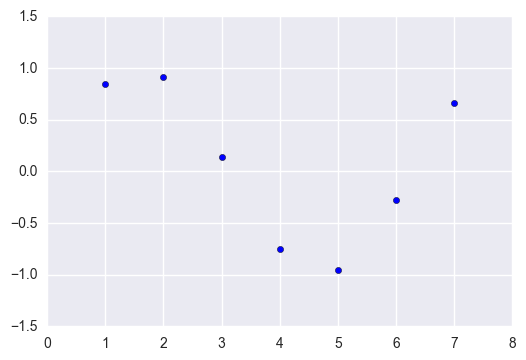

In [50]:
plt.scatter(points, f(points))

In [51]:
absolute_errors = np.abs(difference(f, interpolate_points))
print 'absolute errors: {}'.format(absolute_errors)

relative_errors = absolute_errors / np.abs(np.sin(interpolate_points))
print 'relative errors: {}'.format(relative_errors)

absolute errors: [ 0.01875711  0.0079042   0.00279303  0.00263247  0.00311971  0.00324372]
relative errors: [ 0.01880422  0.01320729  0.00796226  0.00269298  0.00442173  0.01507866]


In [66]:
error_bound_spline = lambda x: 5./384*np.abs(np.sin(x))

In [67]:
error_bound_spline(interpolate_points)

array([ 0.01298822,  0.00779261,  0.00456749,  0.01272826,  0.00918672,
        0.00280104])

Интерполяция многочленом

In [52]:
polynomial_interpolation = np.poly1d(np.polyfit(points, values, deg=3))

In [53]:
polynomial_interpolation(points)

array([ 0.93247425,  0.71773991,  0.11046012, -0.53865297, -0.87888724,
       -0.55953055,  0.77012924])

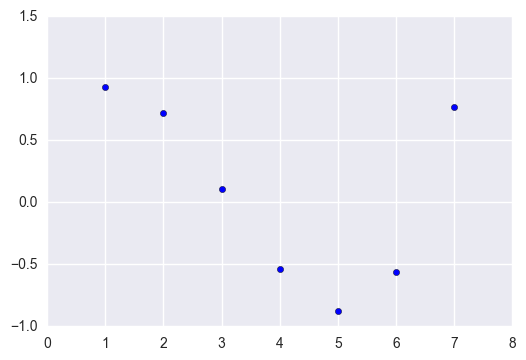

In [54]:
plt.scatter(points, polynomial_interpolation(points))

In [55]:
absolute_errors_polynomial = np.abs(difference(polynomial_interpolation, interpolate_points))
print 'absolute errors: {}'.format(absolute_errors_polynomial)

relative_errors_polynomial = absolute_errors_polynomial / np.abs(np.sin(interpolate_points))
print 'relative errors: {}'.format(relative_errors_polynomial)

absolute errors: [ 0.10140022  0.15722346  0.11999646  0.20823065  0.11803695  0.25802804]
relative errors: [ 0.10165487  0.26270806  0.34208151  0.21301712  0.16730008  1.19946101]


In [62]:
error_bound = np.vectorize(lambda x: 1./720*np.prod(np.abs(x - points)))

In [63]:
error_bound(interpolate_points)

array([ 0.11279297,  0.03076172,  0.01708984,  0.01708984,  0.03076172,
        0.11279297])

Совпадает по порядку величины